In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lobster_data = np.load('vwap.npy')

In [3]:
# Method 1: Simple indexing to 100
def normalize_to_100(data):
    # divide each sequence by its first value and multiply by 100
    return 100 * (data / data[:, 0][:, None])  

# Calculate percentage changes between consecutive points
def pct_change_series(data):
    return (data[:, 1:] - data[:, :-1]) / data[:, :-1]

#### Volume-Weighted Average Price

In [4]:
print(f"Number of Sequences: {len(lobster_data)}, Sequence Length: {len(lobster_data[0])}")

Number of Sequences: 98087, Sequence Length: 390


In [5]:
normalized_data = normalize_to_100(lobster_data)
pct_changes = pct_change_series(lobster_data)

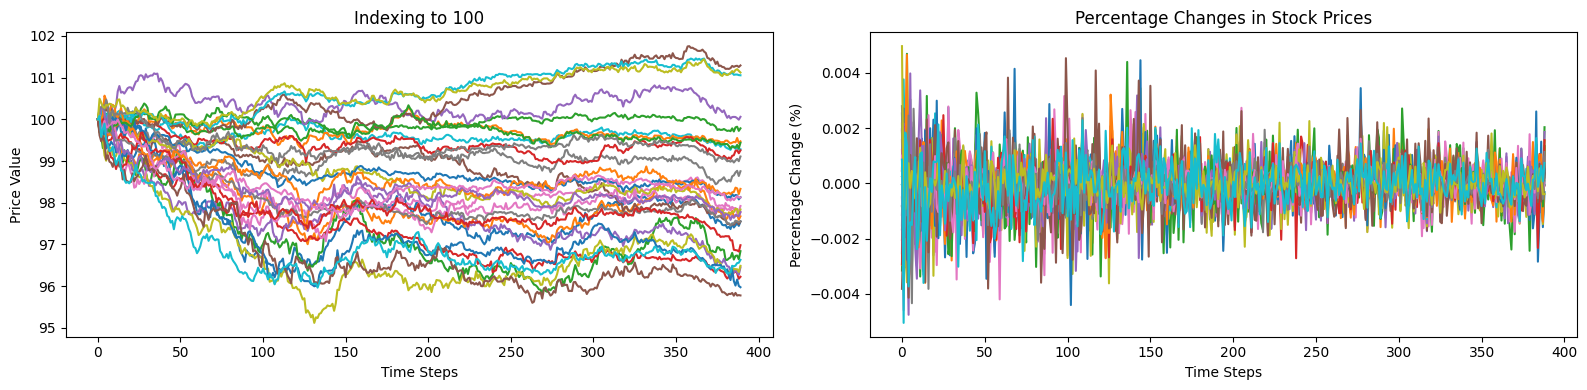

In [8]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot highest starting points
ax1.plot(normalized_data[:30].T)
ax2.plot(pct_changes[:30].T)
ax1.set_title('Indexing to 100')
ax2.set_title('Percentage Changes in Stock Prices')
ax1.set_xlabel('Time Steps')
ax2.set_xlabel('Time Steps')
ax1.set_ylabel('Price Value')
ax2.set_ylabel('Percentage Change (%)')

plt.tight_layout()
plt.show()

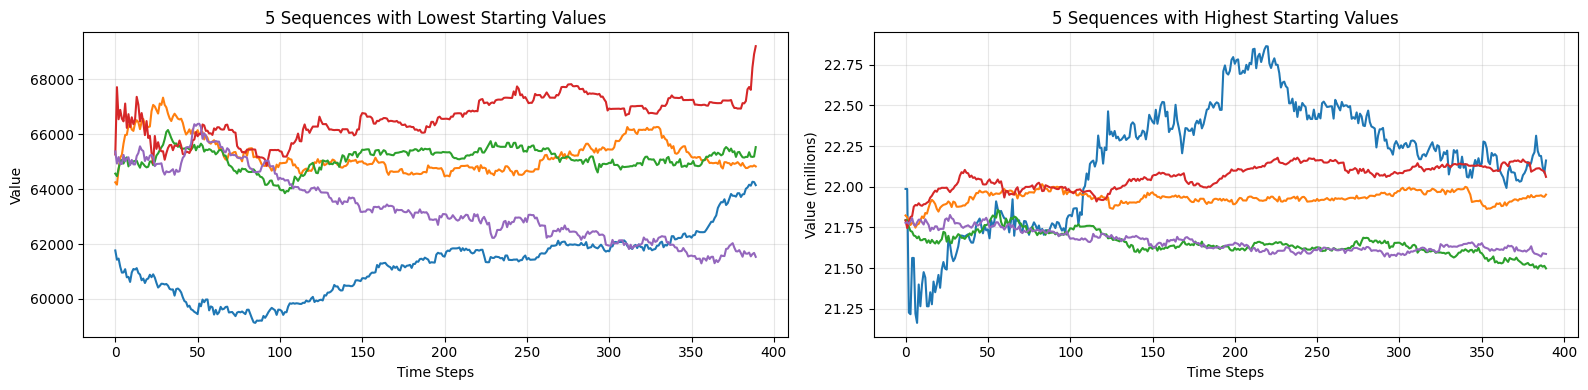

In [7]:
# Get indices of sequences sorted by their starting values
start_values = lobster_data[:, 0]  # Get first value of each sequence
highest_indices = (-start_values).argsort()[:5]  # Top 5 indices
lowest_indices = start_values.argsort()[:5]  # Bottom 5 indices

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot lowest starting points
for idx in lowest_indices:
    ax1.plot(lobster_data[idx])
ax1.set_title('5 Sequences with Lowest Starting Values')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)

# Plot highest starting points
for idx in highest_indices:
    ax2.plot(lobster_data[idx] / 1_000_000)  # Divide by 1M to show in millions
ax2.set_title('5 Sequences with Highest Starting Values')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Value (millions)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()